In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import ast


# IMPORTING THE DATA SET


In [2]:
messy=pd.read_csv('cars_for_sale(uncleaned).csv')
messy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9246 entries, 0 to 9245
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car                   9071 non-null   object 
 1   Condition             9071 non-null   object 
 2   Mileage               9071 non-null   object 
 3   Price                 9071 non-null   object 
 4   Basics Info           9242 non-null   object 
 5   Vehicle History Info  9242 non-null   object 
 6   Vehicle Reviews Info  9242 non-null   object 
 7   Seller Rating         7716 non-null   float64
 8   Seller Rating Count   7716 non-null   object 
 9   Seller Address        8954 non-null   object 
dtypes: float64(1), object(9)
memory usage: 722.5+ KB


# We found 2500 duplicateded in the data set so we remove them

In [3]:
messy.duplicated().sum()

np.int64(2531)

In [4]:
messy.drop_duplicates(inplace=True)

# Questions for analysis
1. What is the average price of cars , and how does it vary by condition?
1. Are certain brands or models more expensive than others?
1. How does mileage affect the price of cars?
1. How does accident history impact car prices?
1. How do prices vary across car produstion year?
1. Are cars with higher ratings priced higher?


In [5]:
messy.head()


,Car,Condition,Mileage,Price,Basics Info,Vehicle History Info,Vehicle Reviews Info,Seller Rating,Seller Rating Count,Seller Address
0,2024 Lexus LC 500 Base,New,0 mi.,"$112,865MSRP $118,865","{'Exterior color': ' Caviar ', 'Interior color...",{},{},4.7,"(1,261 reviews)","1250 W Division St Chicago, IL 60642"
1,2007 Acura TSX Base,Used,"61,110 mi.","$11,295",{'Exterior color': ' Alabaster Silver Metallic...,{'Accidents or damage': 'At least 1 accident o...,{},4.2,(440 reviews),"1301 N Elston Ave Chicago, IL 60642"
2,2016 McLaren 675LT Base,Used,"6,305 mi.","$219,997$5,464 price drop","{'Exterior color': ' McLaren Orange ', 'Interi...",{'Accidents or damage': 'At least 1 accident o...,"{'Comfort': '5.0', 'Interior': '5.0', 'Perform...",3.1,(421 reviews),"1561 N Fremont St Chicago, IL 60642"
3,2016 Audi TTS 2.0T quattro,Used,"65,715 mi.","$23,999","{'Exterior color': ' Black ', 'Interior color'...",{'Accidents or damage': 'At least 1 accident o...,"{'Comfort': '3.0', 'Interior': '5.0', 'Perform...",3.6,(123 reviews),"560 E North Ave West Chicago, IL 60185"
4,2018 BMW 740e xDrive iPerformance,Used,"19,830 mi.","$39,799$100 price drop","{'Exterior color': ' Imperial Blue Metallic ',...","{'Accidents or damage': 'None reported', 'Clea...","{'Comfort': '5.0', 'Interior': '5.0', 'Perform...",4.4,(91 reviews),"6539 Ogden Ave Berwyn, IL 60402"


### but data set is messy and not ready yet to perform analysis on it 
### first column price we need to convert it to a real number 
### so first we convert it to string that can be converted to number
### then we convert it to numeric

In [6]:
pattern = r"\$\d+(?:,\d{3})*"
messy['Price'] = messy['Price'].apply(lambda x: re.search(pattern, str(x)).group(0) if re.search(pattern, str(x)) else None)
messy['Price']= pd.to_numeric(messy['Price'].str.replace('$','').str.replace(',',''))
messy.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6715 entries, 0 to 9243
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car                   6713 non-null   object 
 1   Condition             6713 non-null   object 
 2   Mileage               6713 non-null   object 
 3   Price                 6701 non-null   float64
 4   Basics Info           6714 non-null   object 
 5   Vehicle History Info  6714 non-null   object 
 6   Vehicle Reviews Info  6714 non-null   object 
 7   Seller Rating         5762 non-null   float64
 8   Seller Rating Count   5762 non-null   object 
 9   Seller Address        6637 non-null   object 
dtypes: float64(2), object(8)
memory usage: 577.1+ KB


# the same thing we do with mileage column

In [7]:
messy['Mileage'] = messy['Mileage'].str.replace('mi.', '').str.replace(',', '')
messy['Mileage']=pd.to_numeric(messy['Mileage'],errors='coerce')
messy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6715 entries, 0 to 9243
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car                   6713 non-null   object 
 1   Condition             6713 non-null   object 
 2   Mileage               6603 non-null   float64
 3   Price                 6701 non-null   float64
 4   Basics Info           6714 non-null   object 
 5   Vehicle History Info  6714 non-null   object 
 6   Vehicle Reviews Info  6714 non-null   object 
 7   Seller Rating         5762 non-null   float64
 8   Seller Rating Count   5762 non-null   object 
 9   Seller Address        6637 non-null   object 
dtypes: float64(3), object(7)
memory usage: 577.1+ KB


# new cars mileage should be 0 but it appears to be Nan 

In [8]:
messy[ (~messy['Condition'].isna()) & (messy['Mileage'].isna())]

,Car,Condition,Mileage,Price,Basics Info,Vehicle History Info,Vehicle Reviews Info,Seller Rating,Seller Rating Count,Seller Address
115,2024 Lexus LC 500 Base,New,NaN,115060.0,"{'Exterior color': ' Ultra White ', 'Interior ...",{},{},4.9,"(2,710 reviews)","2000 N Waukegan Rd Glenview, IL 60025"
463,2024 Lexus RX 350h Luxury,New,NaN,68180.0,"{'Exterior color': ' Iridium ', 'Interior colo...",{},"{'Comfort': '5.0', 'Interior': '5.0', 'Perform...",4.9,"(2,710 reviews)","2000 N Waukegan Rd Glenview, IL 60025"
778,2024 RAM ProMaster 2500 High Roof,New,NaN,56150.0,"{'Exterior color': ' Bright White Clearcoat ',...",{},{},4.9,"(4,658 reviews)","8355 W 159th St Tinley Park, IL 60477"
1011,2024 Lexus RX 350h Luxury,New,NaN,67715.0,"{'Exterior color': ' Eminent White Pearl ', 'I...",{},"{'Comfort': '5.0', 'Interior': '5.0', 'Perform...",4.7,"(2,711 reviews)","8300 W 159th St Orland Park, IL 60462"
1038,2024 RAM 2500 Laramie,New,NaN,81999.0,"{'Exterior color': ' Diamond Black ', 'Interio...",{},{},4.9,"(4,656 reviews)","8355 W 159th St Tinley Park, IL 60477"
...,...,...,...,...,...,...,...,...,...,...
8698,2024 Jeep Gladiator Sport,New,NaN,54571.0,{'Exterior color': ' Granite Crystal Clearcoat...,{},{},4.9,"(4,656 reviews)","8355 W 159th St Tinley Park, IL 60477"
8826,2024 RAM 2500 Tradesman,New,NaN,67097.0,{'Exterior color': ' Granite Crystal Clearcoat...,{},{},4.9,"(4,656 reviews)","8355 W 159th St Tinley Park, IL 60477"
8893,2024 Ford Maverick XL,New,NaN,28880.0,"{'Exterior color': ' White ', 'Interior color'...",{},"{'Comfort': '4.0', 'Interior': '3.0', 'Perform...",4.3,"(2,866 reviews)","8100 West 159th Street Orland Park, IL 60462"
9016,2024 Chrysler Pacifica Limited,New,NaN,57331.0,"{'Exterior color': ' Bright White Clearcoat ',...",{},{},4.9,"(4,656 reviews)","8355 W 159th St Tinley Park, IL 60477"


In [9]:
len(messy[ (~messy['Condition'].isna()) & (messy['Mileage'].isna())])

110

# so we edit them to set them to 0

In [10]:
messy.loc[(messy['Condition'] == 'New') & (messy['Mileage'].isna()), 'Mileage'] = 0
len(messy[ (~messy['Condition'].isna()) & (messy['Mileage'].isna())])

0

In [11]:
messy['Brand'] = messy['Car'].str.split().str[1]
messy['Brand'].value_counts()

Brand
Ford             642
Jeep             626
Chevrolet        610
Nissan           444
Mercedes-Benz    335
BMW              334
Subaru           316
Honda            297
Toyota           268
Audi             228
Cadillac         220
Kia              219
Lexus            210
Volkswagen       209
RAM              177
INFINITI         140
Hyundai          140
Dodge            113
Tesla            111
Lincoln          102
Mazda             90
GMC               88
Volvo             86
Chrysler          79
Buick             72
Porsche           68
Acura             66
Jaguar            45
Land              41
Mitsubishi        41
Maserati          31
Ferrari           29
Genesis           28
MINI              28
Alfa              25
Rivian            19
Rolls-Royce       19
Scion             19
Aston             16
Lamborghini       15
Pontiac           11
Bentley            9
Saab               7
Polestar           6
McLaren            6
Saturn             6
Hummer             5
Mercury

# We will use the production year of the car so we extract it from car column and set it in another 'year' column

In [12]:
messy['year']=messy['Car'].str[0:5]
messy['year']=pd.to_numeric(messy['year'])
messy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6715 entries, 0 to 9243
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car                   6713 non-null   object 
 1   Condition             6713 non-null   object 
 2   Mileage               6713 non-null   float64
 3   Price                 6701 non-null   float64
 4   Basics Info           6714 non-null   object 
 5   Vehicle History Info  6714 non-null   object 
 6   Vehicle Reviews Info  6714 non-null   object 
 7   Seller Rating         5762 non-null   float64
 8   Seller Rating Count   5762 non-null   object 
 9   Seller Address        6637 non-null   object 
 10  Brand                 6713 non-null   object 
 11  year                  6713 non-null   float64
dtypes: float64(4), object(8)
memory usage: 682.0+ KB


In [13]:
messy.nunique()

Car                     3449
Condition                 31
Mileage                 3977
Price                   4432
Basics Info             6574
Vehicle History Info      37
Vehicle Reviews Info     267
Seller Rating             32
Seller Rating Count      311
Seller Address           388
Brand                     57
year                      56
dtype: int64

# We have too many conditions that is certifified from the manufacturer >>> so we combine them into one condition 'Certified'

In [14]:
messy['Condition'].value_counts()

Condition
Used                       3624
New                        2703
Chevrolet Certified          55
Mercedes-Benz Certified      31
Ford Certified               28
BMW Certified                27
Porsche Certified            23
Audi Certified               22
Nissan Certified             21
Subaru Certified             20
Jeep Certified               20
Volkswagen Certified         18
GMC Certified                13
Buick Certified              13
Ferrari Certified            11
Cadillac Certified           11
Honda Certified               9
Certified                     8
Dodge Certified               8
Rolls-Royce Certified         6
Hyundai Certified             6
Lincoln Certified             6
Chrysler Certified            5
RAM Certified                 5
INFINITI Certified            4
Genesis Certified             4
Volvo Certified               3
Acura Certified               3
Kia Certified                 3
Maserati Certified            2
Aston Martin Certified        

In [15]:
messy['Condition']=messy['Condition'].apply(lambda x: 'Certified' if x not in ('New','Used',np.nan) else x)
messy['Condition'].value_counts()

Condition
Used         3624
New          2703
Certified     386
Name: count, dtype: int64

# We wont use these columns so we can drop them.

In [16]:
messy=messy.drop(columns=['Basics Info','Vehicle Reviews Info'])
messy.isna().sum()

Car                       2
Condition                 2
Mileage                   2
Price                    14
Vehicle History Info      1
Seller Rating           953
Seller Rating Count     953
Seller Address           78
Brand                     2
year                      2
dtype: int64

# Now we will only drop nulls from the important columns only 

In [17]:
messy = messy.dropna(subset=['Price'])
messy.isna().sum()

Car                       0
Condition                 0
Mileage                   0
Price                     0
Vehicle History Info      0
Seller Rating           951
Seller Rating Count     951
Seller Address           76
Brand                     0
year                      0
dtype: int64

# 1. **Extracting Data:**
    The column `Vehicle History Info` contains nested data in string format.
    We use `ast.literal_eval` to convert it into a Python dictionary.

# 2. **Creating a New Column:**
    Extract the `"Accidents or damage"` field from the parsed dictionary.
    If the field is missing, we default it to `'Unknown'`.

# 3. **Analyzing Price Relation:**
    Group vehicles by the `"Accidents or damage"` status.
    Compute the average price, median price, and the total number of vehicles for each group.


In [18]:
messy['Vehicle History Info'] = messy['Vehicle History Info'].apply(ast.literal_eval)

# Extract the "Accidents or damage" field
messy['Accidents or damage'] = messy['Vehicle History Info'].apply(lambda x: x.get('Accidents or damage', 'Unknown'))

price_relation = messy.groupby('Accidents or damage')['Price'].agg(
    Average_Price='mean',
    Median_Price='median',
    Vehicle_Count='count'
).reset_index()

print(price_relation)

                      Accidents or damage  Average_Price  Median_Price  \
0  At least 1 accident or damage reported   23530.398431       19895.0   
1                           None reported   38454.074773       26975.0   
2                                 Unknown   49298.148668       45396.5   

   Vehicle_Count  
0           1275  
1           2648  
2           2778  


In [19]:
messy['Price'].describe()

count    6.701000e+03
mean     4.011012e+04
std      3.963931e+04
min      1.997000e+03
25%      2.199100e+04
50%      3.286200e+04
75%      4.898800e+04
max      1.699800e+06
Name: Price, dtype: float64

## there is huge variance and outliers in the price 

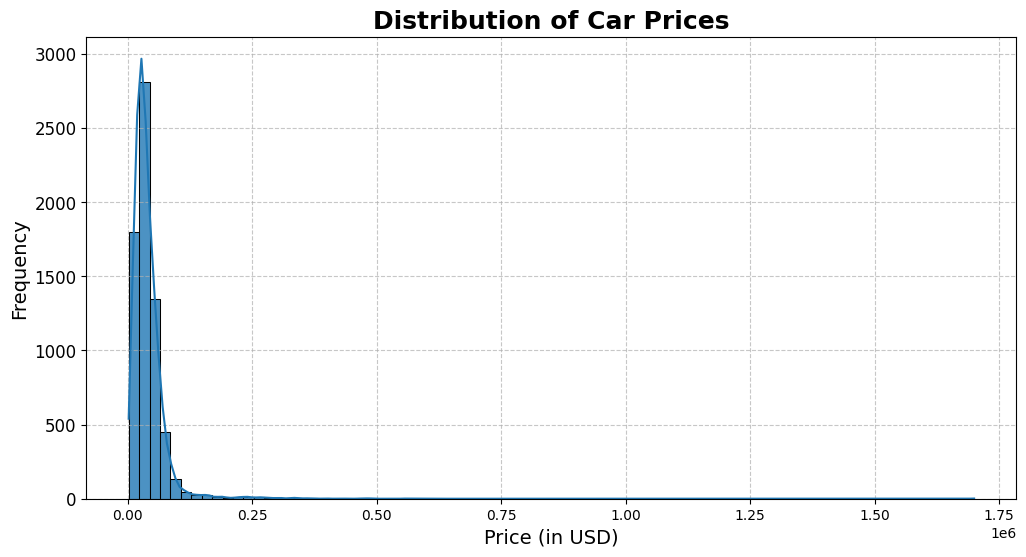

In [20]:
plt.figure(figsize=(12, 6))
m=sns.histplot(messy['Price'], kde=True, bins=int(len(messy)**0.5), color="#1f77b4", alpha=0.8)
plt.title('Distribution of Car Prices', fontsize=18, weight="bold")
plt.xlabel('Price (in USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [21]:
messy['Mileage'].describe()

count      6701.000000
mean      34180.811371
std       43298.978289
min           0.000000
25%           9.000000
50%       16000.000000
75%       59057.000000
max      324349.000000
Name: Mileage, dtype: float64

# setting the quantiles of price and INTER QUARTILE RANGE 

# then we make non_outliers of price data frame 

In [22]:
df_copy = messy.copy()
Q1 = df_copy['Price'].quantile(0.25)
Q3 = df_copy['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_copy[(df_copy['Price'] < lower_bound) | (df_copy['Price'] > upper_bound)]
non_outliers = df_copy[(df_copy['Price'] >= lower_bound) & (df_copy['Price'] <= upper_bound)]

# Some info about the outliers

In [23]:
outlier_stats = {
        'total_count': len(df_copy),
        'outliers_count': len(outliers),
        'outliers_percentage': len(outliers) / len(df_copy) * 100,
        'min_outlier': outliers['Price'].min(),
        'max_outlier': outliers['Price'].max()
    }
outlier_stats , non_outliers['Price'].describe()

({'total_count': 6701,
  'outliers_count': 273,
  'outliers_percentage': 4.074018803163707,
  'min_outlier': np.float64(89485.0),
  'max_outlier': np.float64(1699800.0)},
 count     6428.000000
 mean     34950.378345
 std      18131.699991
 min       1997.000000
 25%      21499.750000
 50%      31892.000000
 75%      46671.250000
 max      89345.000000
 Name: Price, dtype: float64)

# Making the final figures and the visuals using cleaned dataset

C:\Users\amrsa\AppData\Local\Temp\ipykernel_7692\2535135971.py:23: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.histplot(data=non_outliers, x='Price', hue='Condition', multiple='stack', kde=True,
C:\Users\amrsa\AppData\Local\Temp\ipykernel_7692\2535135971.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers['Mileage_Group'] = pd.cut(non_outliers['Mileage'], bins=range(0, 240001, 20000),
C:\Users\amrsa\AppData\Local\Temp\ipykernel_7692\2535135971.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warn

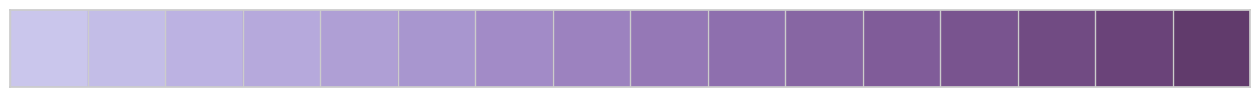

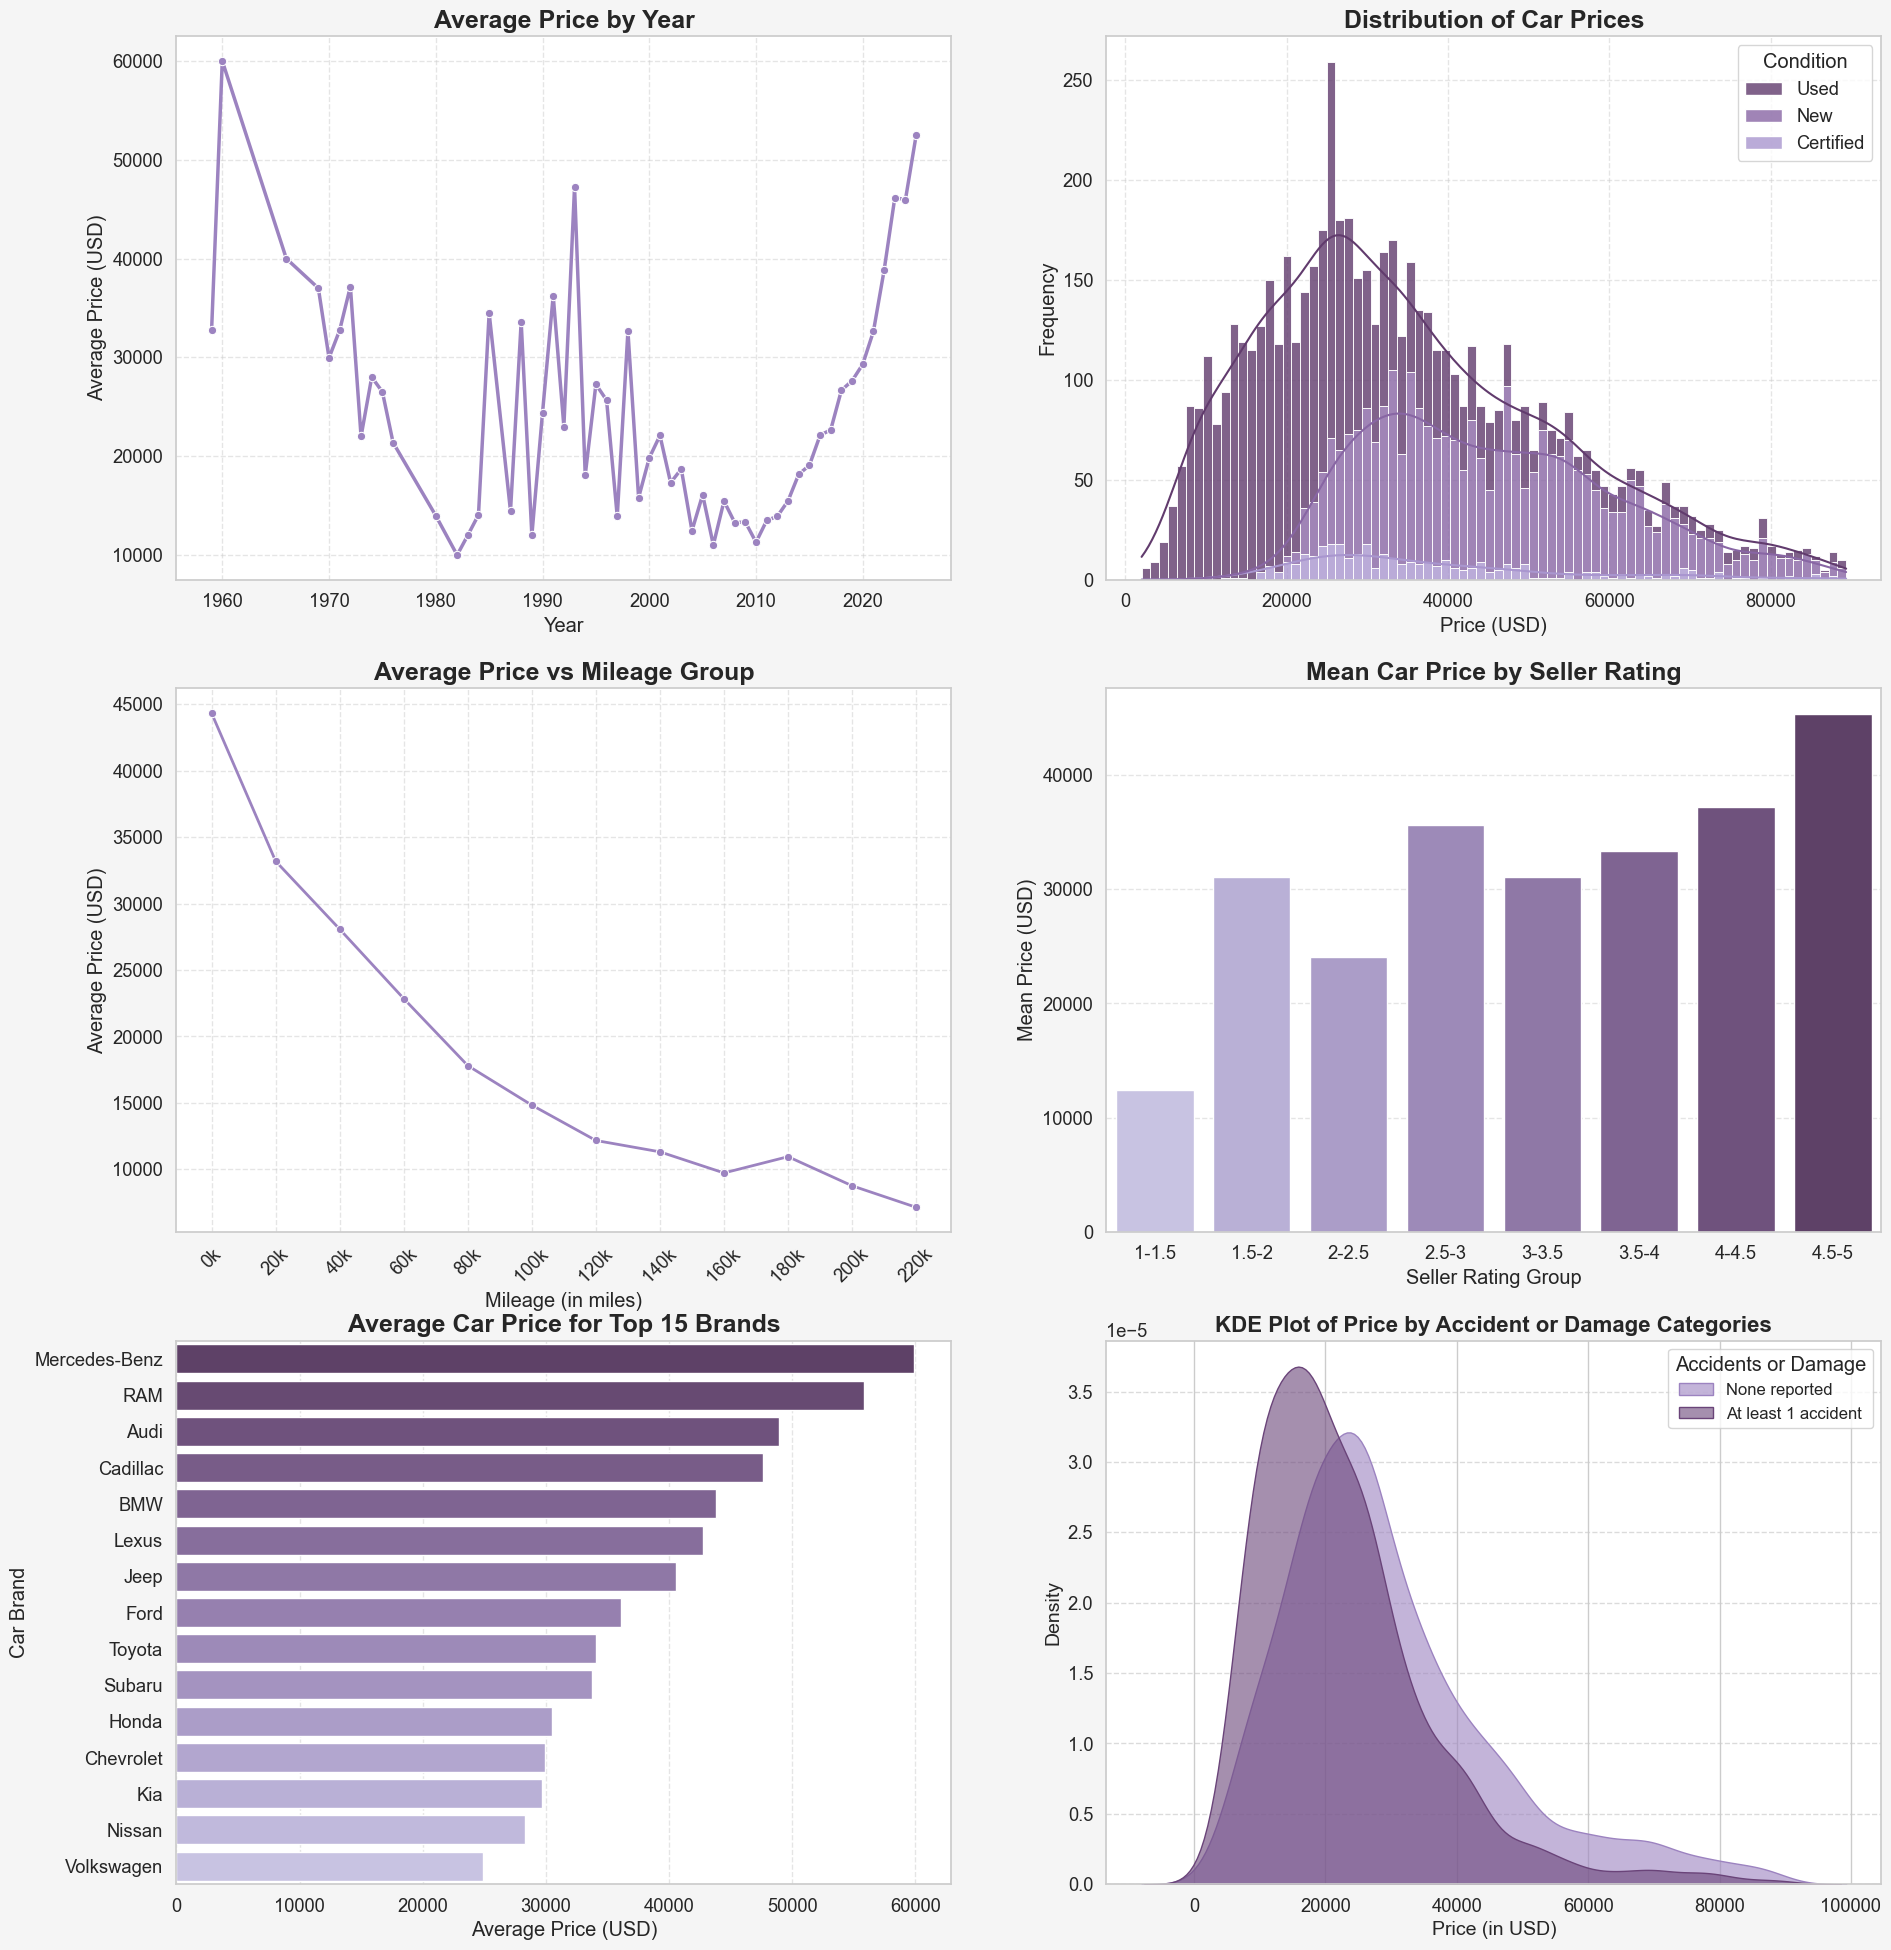

<Figure size 640x480 with 0 Axes>

In [24]:
# Set Seaborn theme and a consistent color palette

sns.set_theme(style="whitegrid", font_scale=1.2)
blues_purples = sns.color_palette("ch:0.5,-0.2,dark=0.3,light=0.8", n_colors=16)
sns.palplot(blues_purples)

# Define a custom color for consistency (from viridis palette)
base_color = blues_purples[7]  # Dark purple from viridis
secondary_color = blues_purples[14]  # Teal from viridis

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(22, 24))
fig.patch.set_facecolor('#f5f5f5')
# ---- Plot 1: Average Price by Year ----
avg_price_by_year = non_outliers.groupby('year')['Price'].mean().reset_index()
sns.lineplot(data=avg_price_by_year, x='year', y='Price', marker='o', color=base_color, linewidth=2.5, ax=axes[0, 0])
axes[0, 0].set_title('Average Price by Year', fontsize=18, weight="bold")
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Average Price (USD)')
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# ---- Plot 2: Distribution of Car Prices ----
sns.histplot(data=non_outliers, x='Price', hue='Condition', multiple='stack', kde=True,
             bins=int(len(non_outliers)**0.5), palette=blues_purples[::-5], alpha=0.8, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Car Prices', fontsize=18, weight="bold")
axes[0, 1].set_xlabel('Price (USD)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

# ---- Plot 3: Average Price vs Mileage Group ----
non_outliers['Mileage_Group'] = pd.cut(non_outliers['Mileage'], bins=range(0, 240001, 20000),
                                       labels=[f'{i}k' for i in range(0, 230, 20)])
avg_price_by_mileage = non_outliers.groupby('Mileage_Group')['Price'].mean().reset_index()
sns.lineplot(data=avg_price_by_mileage, x='Mileage_Group', y='Price', marker='o', color=base_color,
             linewidth=2, ax=axes[1, 0])
axes[1, 0].set_title('Average Price vs Mileage Group', fontsize=18, weight="bold")
axes[1, 0].set_xlabel('Mileage (in miles)')
axes[1, 0].set_ylabel('Average Price (USD)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

# ---- Plot 4: Mean Price by Seller Rating Group ----
messy['Rating Group'] = pd.cut(messy['Seller Rating'], bins=[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
                                      labels=["1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"],
                                      include_lowest=True)
grouped_data = messy.groupby('Rating Group')['Price'].mean().reset_index().dropna()
sns.barplot(x='Rating Group', y='Price', data=grouped_data,palette=blues_purples[1::2], ax=axes[1, 1])
axes[1, 1].set_title('Mean Car Price by Seller Rating', fontsize=18, weight='bold')
axes[1, 1].set_xlabel('Seller Rating Group')
axes[1, 1].set_ylabel('Mean Price (USD)')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

# ---- Plot 5: Average Price for Top 15 Brands ----
top_15_brands = messy['Brand'].value_counts().head(15).index
filtered_data = messy[messy['Brand'].isin(top_15_brands)]
avg_price_per_brand = filtered_data.groupby('Brand')['Price'].mean().reset_index()
avg_price_per_brand = avg_price_per_brand.sort_values(by='Price', ascending=False)
sns.barplot(x='Price', y='Brand', data=avg_price_per_brand, palette=blues_purples[::-1], ax=axes[2, 0])
axes[2, 0].set_title('Average Car Price for Top 15 Brands', fontsize=18, weight='bold')
axes[2, 0].set_xlabel('Average Price (USD)')
axes[2, 0].set_ylabel('Car Brand')
axes[2, 0].grid(axis='x', linestyle='--', alpha=0.5)

filtered_data = non_outliers[non_outliers['Accidents or damage'].isin(['None reported', 'At least 1 accident or damage reported'])]

# Create the KDE plot
sns.kdeplot(data=filtered_data[filtered_data['Accidents or damage'] == 'None reported'], 
            x='Price', 
            label='None reported', 
            color=base_color, 
            fill=True, 
            alpha=0.6)
sns.kdeplot(data=filtered_data[filtered_data['Accidents or damage'] == 'At least 1 accident or damage reported'], 
            x='Price', 
            label='At least 1 accident', 
            color=secondary_color, 
            fill=True, 
            alpha=0.6)

# Add titles and labels
axes[2,1].set_title('KDE Plot of Price by Accident or Damage Categories', fontsize=16, weight='bold')
axes[2,1].set_xlabel('Price (in USD)', fontsize=14)
axes[2,1].set_ylabel('Density', fontsize=14)
axes[2,1].legend(title='Accidents or Damage', fontsize=12)


# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---- Add main title and adjust layout ----
fig.suptitle('Comprehensive Car Data Analysis Dashboard', fontsize=24, weight='bold', y=1.03)
plt.tight_layout()
plt.show()
